# Tutorial 3B: Exploratory data analysis

In this part of the tutorial, we study graphical and non graphical EDA. 
### Part 1: Non-Graphical EDA:
#### Measures of centeral location:
    Mean, Median, Mode
#### Measures for variability:
    Range, SD, IQR
#### Correlation


We can extract most of the basic statistics using describe() function. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df1=sns.load_dataset("titanic")
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df1.describe()

/Users/Neuromancer/anaconda/envs/marking/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Part2: Graphical EDA:
    * BarPlot, 
    * Line plot
    * BoxPlot
    * Histogram
    * Scatterplot 



In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

### Basic Example:

In [5]:
import matplotlib.pyplot as plt
import random
random.seed(0)
fig = plt.figure(figsize=(60, 40)) 
N = 100
x = range(N)
y1 = [random.randint(0, 50) for i in x]


### 1. Bar Plot

<Container object of 3 artists>

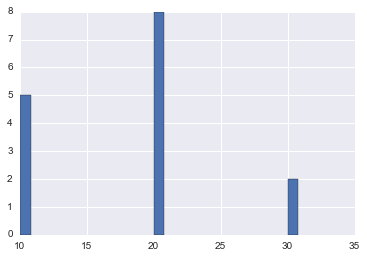

In [6]:
plt.bar([10, 20, 30], [5, 8, 2]) 

### 2. Histogram

(array([  5.,   5.,   8.,   6.,  12.,  14.,  11.,   8.,  14.,  17.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.]),
 <a list of 10 Patch objects>)

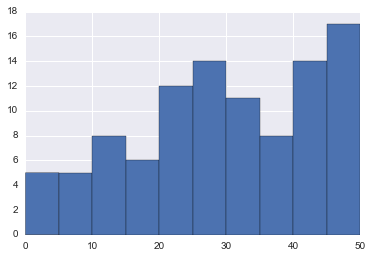

In [7]:
plt.hist(y1)

### 3. Boxplot

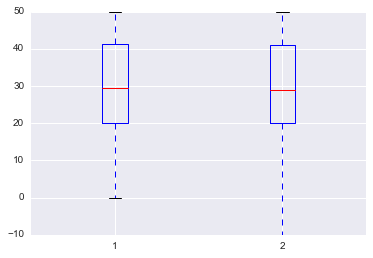

In [8]:
y_outliers = y1+[-10]
plt.boxplot([y1,y_outliers])

plt.show()

### 4. Line plot

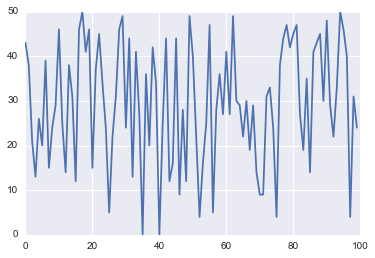

In [9]:
plt.plot(x,y1,'-')

### 5. Scatter plot

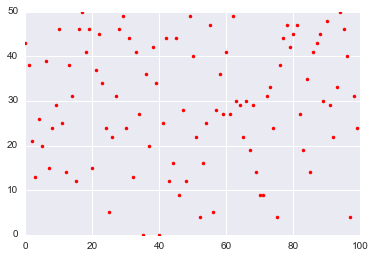

In [10]:
plt.plot(x,y1,'.r')

## Example 1: Titanic Data

Load the dataframe

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
df1=sns.load_dataset("titanic")


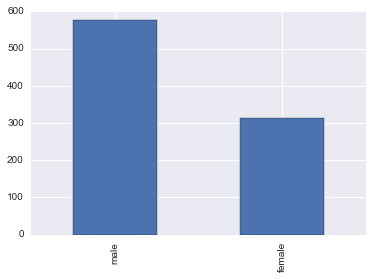

In [12]:
# or plot
import matplotlib.pyplot as plt
%matplotlib inline

df1['sex'].value_counts().plot( kind='bar')

In [13]:
df1['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

embarked is 'S', 'C', nan, 'Q'

What do the letters mean. How many missing values are there?

Check the wikipedia page to find out that https://en.wikipedia.org/wiki/RMS_Titanic"Southampton... Additional passengers were picked up at Cherbourg and Queenstown."

So that would seem to be the S, 'Southampton'


In [14]:
df1['embarked'].value_counts() # notice that 'nan' doesn't count or isn't counted

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [15]:
914 + 270 + 123 

1307

In [16]:
# there are two missing?

In [17]:
df1['fare'].value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
7.2292      15
26.5500     15
0.0000      15
8.6625      13
7.8542      13
7.2500      13
7.2250      12
9.5000       9
16.1000      9
15.5000      8
24.1500      8
14.5000      7
7.0500       7
56.4958      7
52.0000      7
69.5500      7
31.2750      7
14.4542      7
27.9000      6
7.7958       6
30.0000      6
26.2500      6
            ..
6.9500       1
15.0500      1
21.6792      1
7.1417       1
15.0458      1
4.0125       1
12.0000      1
8.4583       1
7.7875       1
14.0000      1
15.0000      1
9.8417       1
12.2750      1
12.2875      1
22.5250      1
6.4500       1
15.5500      1
8.5167       1
63.3583      1
6.8583       1
22.0250      1
13.7917      1
221.7792     1
12.6500      1
8.8500       1
61.1750      1
10.1708      1
76.2917      1
15.1000      1
81.8583      1
Name: fare, dtype: int64

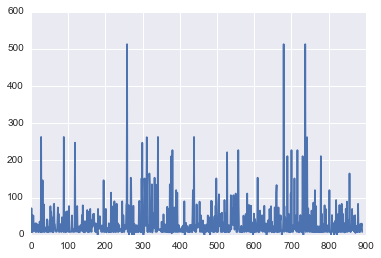

In [18]:
# look at fares, seems like a total mess
plt.plot(df1['fare'])

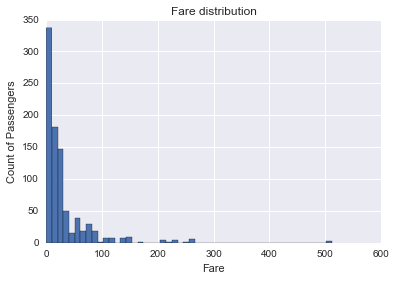

In [19]:
# that's not quite right, it's showing all ~1300 fares left to right
# try another type of plot, histogram, change bins to get different views 

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df1['fare'], bins = 50, range = (df1['fare'].min(),df1['fare'].max()))
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.show()

In [20]:
df1.columns

Index([u'survived', u'pclass', u'sex', u'age', u'sibsp', u'parch', u'fare',
       u'embarked', u'class', u'who', u'adult_male', u'deck', u'embark_town',
       u'alive', u'alone'],
      dtype='object')

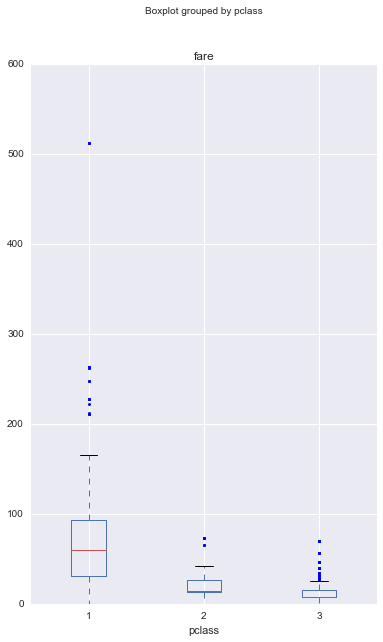

In [21]:
df1.boxplot('fare',by='pclass',sym='k.', figsize=(6, 10))

/Users/Neuromancer/anaconda/envs/marking/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


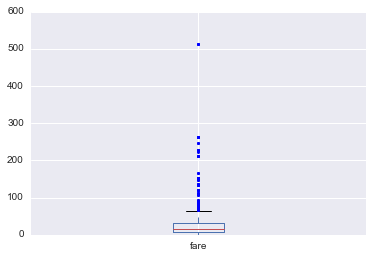

In [22]:
# just look at fare
bp = df1.boxplot(column='fare',sym='k.')

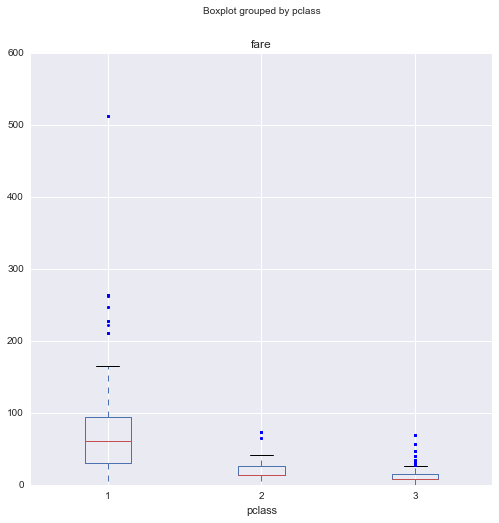

In [23]:
# but there are three 'classes', separate them:
df1.boxplot(column='fare', by = 'pclass',sym='k.', figsize=(8, 8))

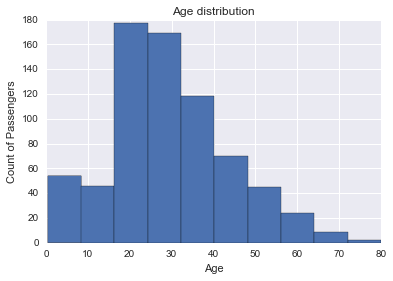

In [24]:
# do similarly with ages
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df1['age'], bins = 10, range = (df1['age'].min(),df1['age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

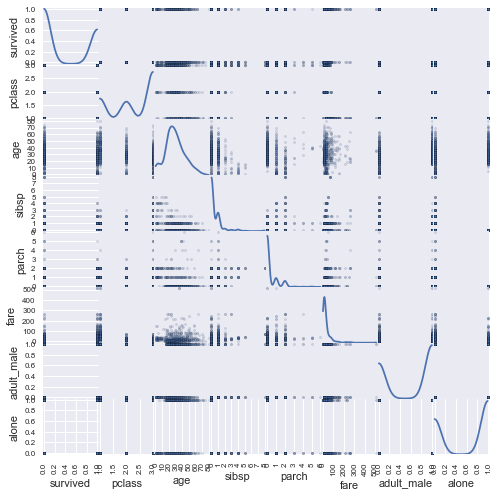

In [25]:
# a multiscatter matrix? Not always useful
from pandas.tools.plotting import scatter_matrix

sm = scatter_matrix(df1, alpha=0.2, figsize=(8, 8), diagonal='kde')

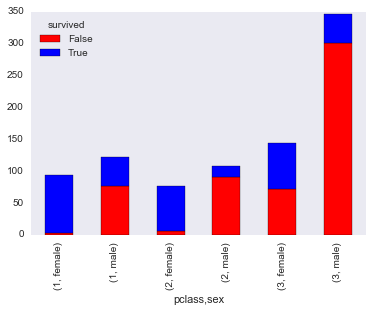

In [26]:
# just to complete the story... what were some of the factors for survival?


ct = pd.crosstab([df1.pclass, df1.sex], df1.survived.astype(bool))
ct.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

### Plotting non-numerical data

In [27]:
df1['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [28]:
df1['sex'].unique()

array(['male', 'female'], dtype=object)

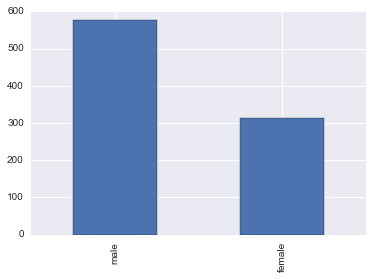

In [29]:
fig, ax = plt.subplots()
df1['sex'].value_counts().plot(ax=ax, kind='bar')

In [30]:
df1['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

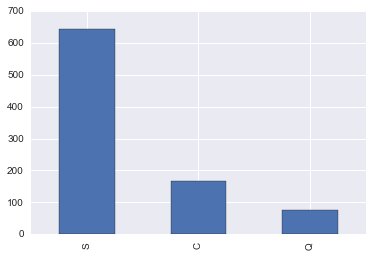

In [31]:
fig, ax = plt.subplots()
df1['embarked'].value_counts().plot(ax=ax, kind='bar')

In [32]:
# note that the something appears to be missing, the 'nan' (it's 'Not A Number', not granny)
# do you want to plot nan anyway?

In [33]:
sum(df1['embarked'].isnull())

2

In [34]:
temp = df1['embarked'].value_counts()

In [35]:
temp

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [36]:
temp['S']

644

In [37]:
temp['NaN'] = sum(df1['embarked'].isnull())

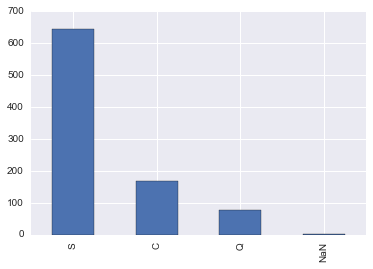

In [38]:
fig, ax = plt.subplots()
temp.plot(ax=ax, kind='bar')

## Example 2

### Exploratory Plotting

In [39]:
import seaborn as sns
%matplotlib inline

df1 = pd.read_pickle('df1.p')

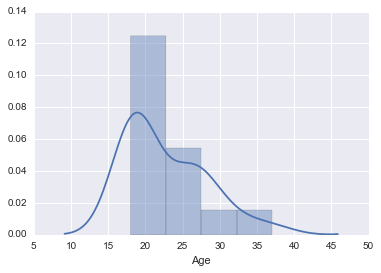

In [40]:
sns.distplot(df1['Age'])

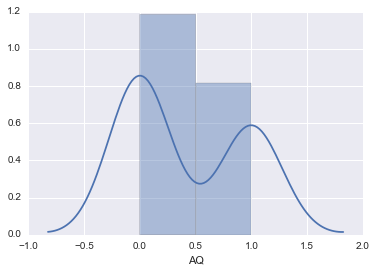

In [41]:
sns.distplot(df1['AQ'].map({'high':1,'low':0}))

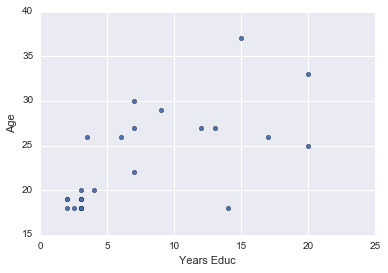

In [42]:
df1.plot(x='Years Educ',y='Age',kind='scatter')

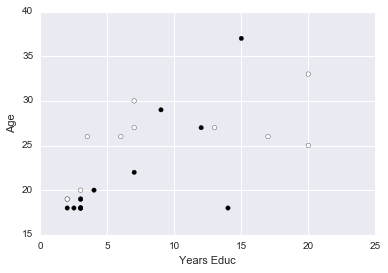

In [43]:
df1.plot(x='Years Educ',y='Age',kind='scatter',color=df1['AQ'].map({'high':1,'low':0}))

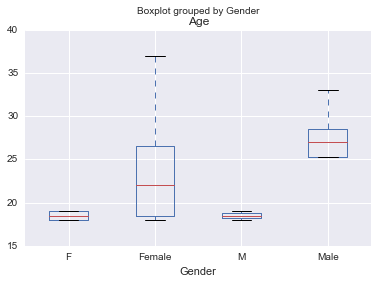

In [44]:
df1.boxplot('Age',by='Gender')

In [45]:
import matplotlib
matplotlib.style.use('ggplot')

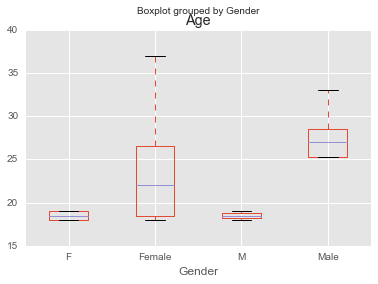

In [46]:
df1.boxplot('Age',by='Gender')